In [1]:
# -*- coding: utf8 -*-


from sirsaia import brasilio
from sirsaia import epiestim
from sirsaia import plotutils

import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


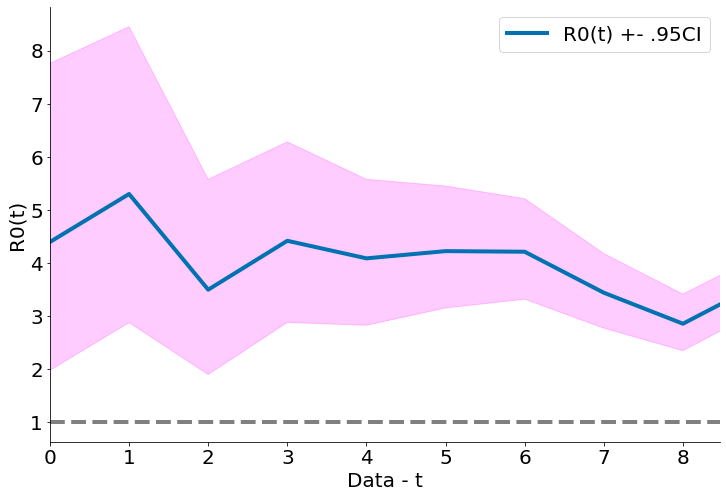

In [3]:
df_orig = pd.read_excel('./data/COVID-19-geographic-disbtribution-worldwide-2020-03-28.xlsx')
df_br = df_orig[df_orig['countriesAndTerritories'] == 'Brazil']
who_df = df_br[['cases']].copy()
who_df.columns = ['local']
who_df.index = pd.to_datetime(df_br['dateRep'])
who_df = who_df.sort_index().fillna(0)
first_day = np.nonzero(who_df.values)[0][0]
who_df = who_df[first_day:]
who_df = who_df[:'2020-03-19']

epiestim_result = epiestim.estimate_r(who_df)
plotutils.plot_result(epiestim_result)

In [4]:
datasets = {}
sheets = glob.glob('data/covid19/[A-Z]*/*.xlsx')
for sheet in sorted(sheets):
    state = os.path.basename(sheet)[:2]
    region = os.path.basename(os.path.dirname(sheet))
    if region not in datasets:
        datasets[region] = {}
    datasets[region][state] = sheet

In [5]:
for region in datasets:
    for state, fpath in datasets[region].items():
        df = brasilio.load_data(fpath)
        model_df = df[['TOTAL NO ESTADO', 'Importados/Indefinidos']].copy()
        model_df.columns = ['local', 'imported']
        epiestim_result = epiestim.estimate_r(model_df)
        plotutils.plot_result(epiestim_result, model_df)
        plt.title(state)
        try:
            os.makedirs('plots/{}/'.format(region))
        except:
            pass
        plt.tight_layout()
        plt.savefig('plots/{}/{}.png'.format(region, state))
        plt.close()

Ignoring imported column, all zeros
1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-14 12:00:00', '2020-03-15 12:00:00',
               '2020-03-16 12:00:00', '2020-03-17 12:00:00',
               '2020-03-18 12:00:00', '2020-03-19 12:00:00',
               '2020-03-20 12:00:00', '2020-03-21 12:00:00',
               '2020-03-22 12:00:00', '2020-03-23 12:00:00',
               '2020-03-24 12:00:00', '2020-03-25 12:00:00',
               '2020-03-26 12:00:00', '2020-03-27 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['14/03', '15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']
Ignoring imported column, all zeros
1     7
2     8
3     9
4    10
5    11
6    12
7    13
8    14
9    15
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1    7
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-27 12:00:00'], dtype='datetime64[ns]', freq=None)
['27/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-15 12:00:00', '2020-03-16 12:00:00',
               '2020-03-17 12:00:00', '2020-03-18 12:00:00',
               '2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
15    21
16    22
17    23
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-13 12:00:00', '2020-03-14 12:00:00',
               '2020-03-15 12:00:00', '2020-03-16 12:00:00',
               '2020-03-17 12:00:00', '2020-03-18 12:00:00',
               '2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['13/03', '14/03', '15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1     7
2     8
3     9
4    10
5    11
6    12
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['23/03', '24/03', '25/03', '26/03', '27/03', '28/03']
Ignoring imported column, all zeros
1    7
2    8
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-27 12:00:00', '2020-03-28 12:00:00'], dtype='datetime64[ns]', freq=None)
['27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03']
Ignoring imported column, all zeros
1    7
2    8
3    9
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-26 12:00:00', '2020-03-27 12:00:00',
               '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03']
Ignoring imported column, all zeros
1     7
2     8
3     9
4    10
5    11
6    12
7    13
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00'],
              dtype='datetime64[ns]', freq

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1     7
2     8
3     9
4    10
5    11
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-24 12:00:00', '2020-03-25 12:00:00',
               '2020-03-26 12:00:00', '2020-03-27 12:00:00',
               '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03']
Ignoring imported column, all zeros
1    7
2    8
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-27 12:00:00', '2020-03-28 12:00:00'], dtype='datetime64[ns]', freq=None)
['27/03', '28/03']
Ignoring imported column, all zeros


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1     7
2     8
3     9
4    10
5    11
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['25/03', '26/03', '27/03', '28/03', '29/03']
Ignoring imported column, all zeros
1    7
2    8
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-27 12:00:00', '2020-03-28 12:00:00'], dtype='datetime64[ns]', freq=None)
['27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1    7
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-28 12:00:00'], dtype='datetime64[ns]', freq=None)
['28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


Ignoring imported column, all zeros
1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
15    21
16    22
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-12 12:00:00', '2020-03-13 12:00:00',
               '2020-03-14 12:00:00', '2020-03-15 12:00:00',
               '2020-03-16 12:00:00', '2020-03-17 12:00:00',
               '2020-03-18 12:00:00', '2020-03-19 12:00:00',
               '2020-03-20 12:00:00', '2020-03-21 12:00:00',
               '2020-03-22 12:00:00', '2020-03-23 12:00:00',
               '2020-03-24 12:00:00', '2020-03-25 12:00:00',
               '2020-03-26 12:00:00', '2020-03-27 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['12/03', '13/03', '14/03', '15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
15    21
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-15 12:00:00', '2020-03-16 12:00:00',
               '2020-03-17 12:00:00', '2020-03-18 12:00:00',
               '2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00',
               '2020-03-29 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
15    21
16    22
17    23
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-12 12:00:00', '2020-03-13 12:00:00',
               '2020-03-14 12:00:00', '2020-03-15 12:00:00',
               '2020-03-16 12:00:00', '2020-03-17 12:00:00',
               '2020-03-18 12:00:00', '2020-03-19 12:00:00',
               '2020-03-20 12:00:00', '2020-03-21 12:00:00',
               '2020-03-22 12:00:00', '2020-03-23 12:00:00',
               '2020-03-24 12:00:00', '2020-03-25 12:00:00',
               '2020-03-26 12:00:00', '2020-03-27 12:00:00',
               '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['12/03', '13/03', '14/03', '15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
13    19
14    20
15    21
16    22
17    23
18    24
19    25
20    26
21    27
22    28
23    29
24    30
25    31
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-04 12:00:00', '2020-03-05 12:00:00',
               '2020-03-06 12:00:00', '2020-03-07 12:00:00',
               '2020-03-08 12:00:00', '2020-03-09 12:00:00',
               '2020-03-10 12:00:00', '2020-03-11 12:00:00',
               '2020-03-12 12:00:00', '2020-03-13 12:00:00',
               '2020-03-14 12:00:00', '2020-03-15 12:00:00',
               '2020-03-16 12:00:00', '2020-03-17 12:00:00',
               '2020-03-18 12:00:00', '2020-03-19 12:00:00',
               '2020-03-20 12:00:00', '2020-03-21 12:00:00',
               '2020-03-22 12:00:00', '2020-03-23 12:00:00',
               '2020-03-24 12:00:00', '2020-03-25 12:00:00',
               '2020-03-26 12:00:00', '2020-03-27 12:00:00',
               '2

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']
Ignoring imported column, all zeros
1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
11    17
12    18
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-17 12:00:00', '2020-03-18 12:00:00',
               '2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-

/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)


1      7
2      8
3      9
4     10
5     11
6     12
7     13
8     14
9     15
10    16
Name: t_end, dtype: int32
DatetimeIndex(['2020-03-19 12:00:00', '2020-03-20 12:00:00',
               '2020-03-21 12:00:00', '2020-03-22 12:00:00',
               '2020-03-23 12:00:00', '2020-03-24 12:00:00',
               '2020-03-25 12:00:00', '2020-03-26 12:00:00',
               '2020-03-27 12:00:00', '2020-03-28 12:00:00'],
              dtype='datetime64[ns]', freq=None)
['19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03']


/home/flaviovdf/miniconda3/envs/corona/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Default config will estimate R on weekly sliding windows.
    To change this change the t_start and t_end arguments. 

  warnings.warn(x, RRuntimeWarning)
